In [2]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성
numpy_array1 = np.random.rand(3)   # 0과 1미만의 난수를 3개 생성

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

첫 번째 실행:
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [ ]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성
numpy_array1 = np.random.rand(3)   # 0과 1미만의 난수를 3개 생성

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

In [ ]:
# 다시 실행 (random seed 설정 X)
random_number2 = random.random()
numpy_array2 = np.random.rand(3)

print("\n두 번째 실행 (seed 설정 X):")
print("Python random:", random_number2)
print("NumPy array:", numpy_array2)

In [ ]:
# Random seed 설정 후 다시 실행
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number3 = random.random()
numpy_array3 = np.random.rand(3)

print("\n세 번째 실행 (seed 설정):")
print("Python random:", random_number3)
print("NumPy array:", numpy_array3)

In [ ]:
# 선형회귀
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인
print(os.listdir()) # 현재 디렉토리의 파일 목록 확인

In [ ]:
# 사전설치 : pip install numpy scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성(난수가 동일한 순서대로 출력)을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 6, 8, 10])  # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      163             72             35        0  26.3   
1            1       98             66             29        0  18.3   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

기술통계:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.930990      69.105469      20.536458   79.799479   
std       3.369578   31.978182      19.3

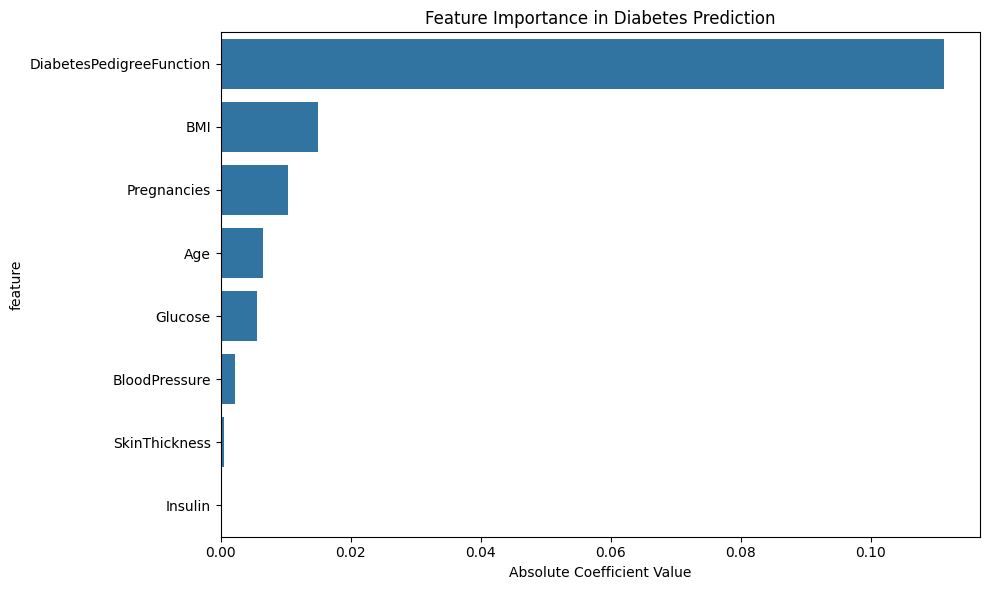

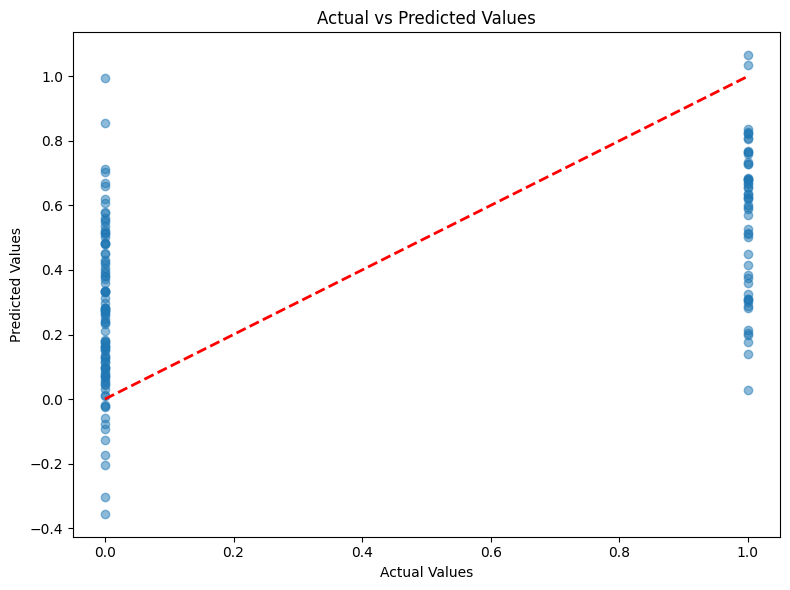

In [ ]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/Advertising.csv')

# 데이터 확인
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()


In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HAN

회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


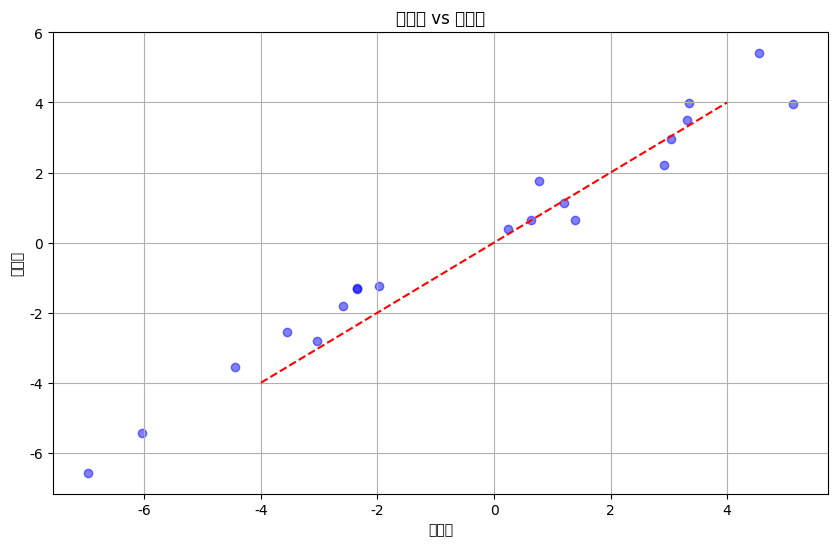


새로운 데이터 예측값: 3.2192


c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [4]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

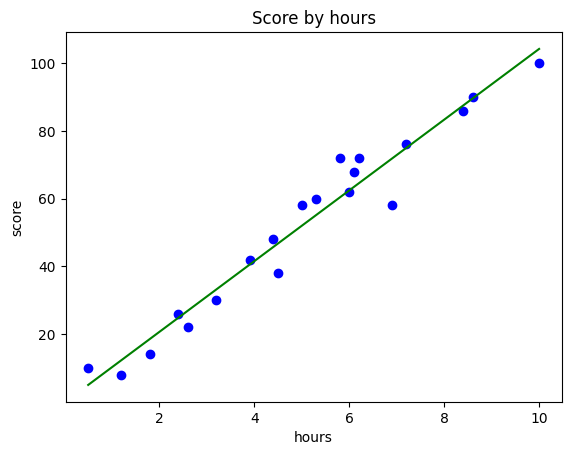

In [6]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [7]:
print('9 시간 공부 시 예상점수:', reg.predict([[9]]))

9 시간 공부 시 예상점수: [93.77478776]


In [8]:
reg.coef_ # 기울기(m)

array([10.44369694])

In [9]:
reg.intercept_ # y절편(b)

np.float64(-0.218484702867201)

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [18]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [20]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [21]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [22]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [23]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [25]:
reg.fit(X_train, y_train)


LinearRegression()

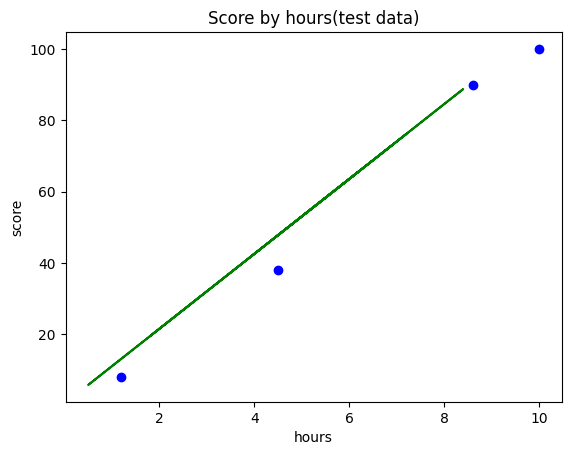

In [27]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
reg.coef_

array([10.49161294])

In [29]:
reg.intercept_

np.float64(0.6115562905169369)

In [30]:
reg.score(X_test, y_test)

0.9727616474310156

In [31]:
## 경사하강법 예제 ##   # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\ai\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

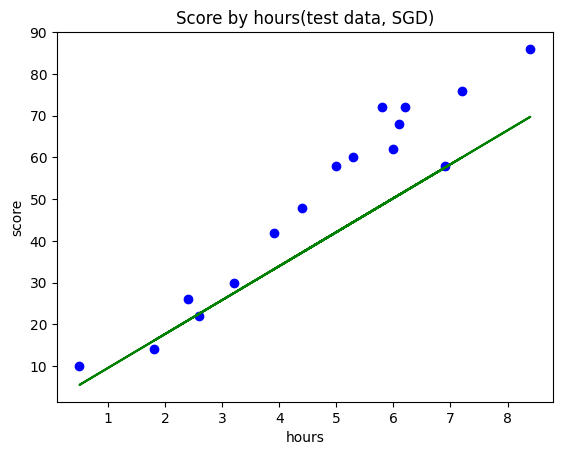

In [32]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [33]:
sr.coef_, sr.intercept_

(array([8.13259556]), array([1.433206]))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./dataset/Advertising.csv')
# dataset

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

new_sales = np.array([[200, 50, 30]])
predictions = model.predict(new_sales)
print(f"\n예측 판매량: {predictions[0]:.1f}")

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"모델 성능 평가: {r_squred:.4f}")

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('The Impact of Advertising on Revenue: A Linear Regression')
plt.xlabel('TV', 'Radio', 'Newspaper')
plt.ylabel('Sales')
plt.show()



예측 판매량: 21.5


c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NameError: name 'r_squred' is not defined

c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



예측 판매량: 21.5
R-squared (테스트 데이터): 0.8994
Mean Squared Error: 3.1741
회귀 방정식: Sales = 2.98 + 0.04*TV + 0.19*Radio + 0.00*Newspaper


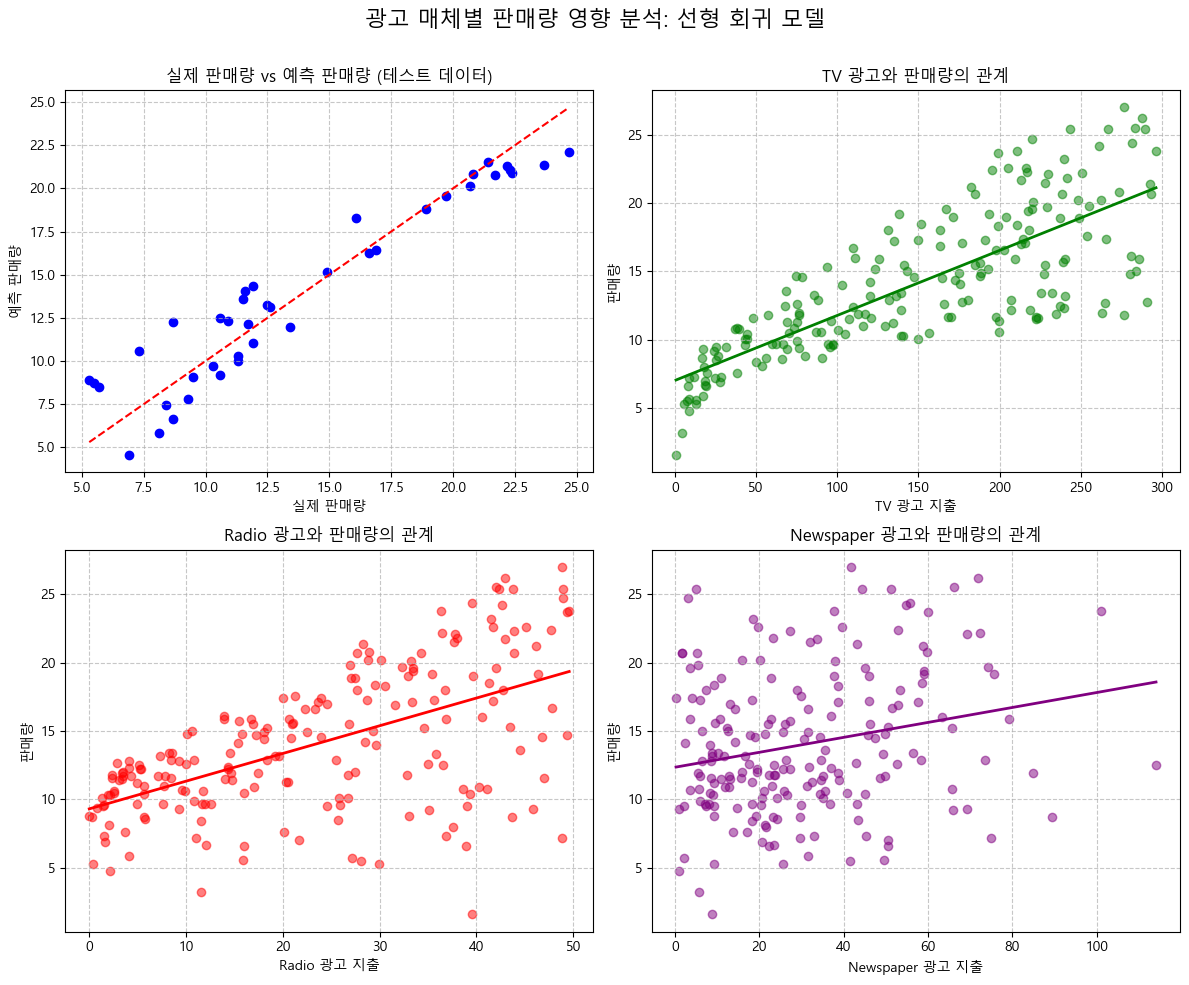

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋 로드
dataset = pd.read_csv('./dataset/Advertising.csv')

# 독립변수와 종속변수 설정
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 새로운 데이터에 대한 예측
new_sales = np.array([[200, 50, 30]])
predictions = model.predict(new_sales)
print(f"\n예측 판매량: {predictions[0]:.1f}")

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (테스트 데이터): {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"회귀 방정식: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f}*TV + {model.coef_[1]:.2f}*Radio + {model.coef_[2]:.2f}*Newspaper")

# 시각화 시작
plt.figure(figsize=(12, 10))

# 1. 실제 판매량 vs 예측 판매량 산점도 (테스트 데이터)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 완벽한 예측 라인
plt.title('실제 판매량 vs 예측 판매량 (테스트 데이터)')
plt.xlabel('실제 판매량')
plt.ylabel('예측 판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. TV 광고와 판매량의 관계
plt.subplot(2, 2, 2)
plt.scatter(X['TV'], y, color='green', alpha=0.5)

# TV 회귀선 계산 (TV만 사용한 단순 회귀)
tv_model = LinearRegression()
tv_model.fit(X[['TV']], y)
tv_x = np.linspace(X['TV'].min(), X['TV'].max(), 100).reshape(-1, 1)
tv_y = tv_model.predict(tv_x)
plt.plot(tv_x, tv_y, color='green', linewidth=2)

plt.title('TV 광고와 판매량의 관계')
plt.xlabel('TV 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Radio 광고와 판매량의 관계
plt.subplot(2, 2, 3)
plt.scatter(X['Radio'], y, color='red', alpha=0.5)

# Radio 회귀선 계산 (Radio만 사용한 단순 회귀)
radio_model = LinearRegression()
radio_model.fit(X[['Radio']], y)
radio_x = np.linspace(X['Radio'].min(), X['Radio'].max(), 100).reshape(-1, 1)
radio_y = radio_model.predict(radio_x)
plt.plot(radio_x, radio_y, color='red', linewidth=2)

plt.title('Radio 광고와 판매량의 관계')
plt.xlabel('Radio 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Newspaper 광고와 판매량의 관계
plt.subplot(2, 2, 4)
plt.scatter(X['Newspaper'], y, color='purple', alpha=0.5)

# Newspaper 회귀선 계산 (Newspaper만 사용한 단순 회귀)
newspaper_model = LinearRegression()
newspaper_model.fit(X[['Newspaper']], y)
newspaper_x = np.linspace(X['Newspaper'].min(), X['Newspaper'].max(), 100).reshape(-1, 1)
newspaper_y = newspaper_model.predict(newspaper_x)
plt.plot(newspaper_x, newspaper_y, color='purple', linewidth=2)

plt.title('Newspaper 광고와 판매량의 관계')
plt.xlabel('Newspaper 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('광고 매체별 판매량 영향 분석: 선형 회귀 모델', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


예산 조합 1 (TV=200, Radio=50, Newspaper=30) → 예측 판매량: 21.47
예산 조합 2 (TV=150, Radio=30, Newspaper=40) → 예측 판매량: 15.47
예산 조합 3 (TV=300, Radio=70, Newspaper=20) → 예측 판매량: 29.70


c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


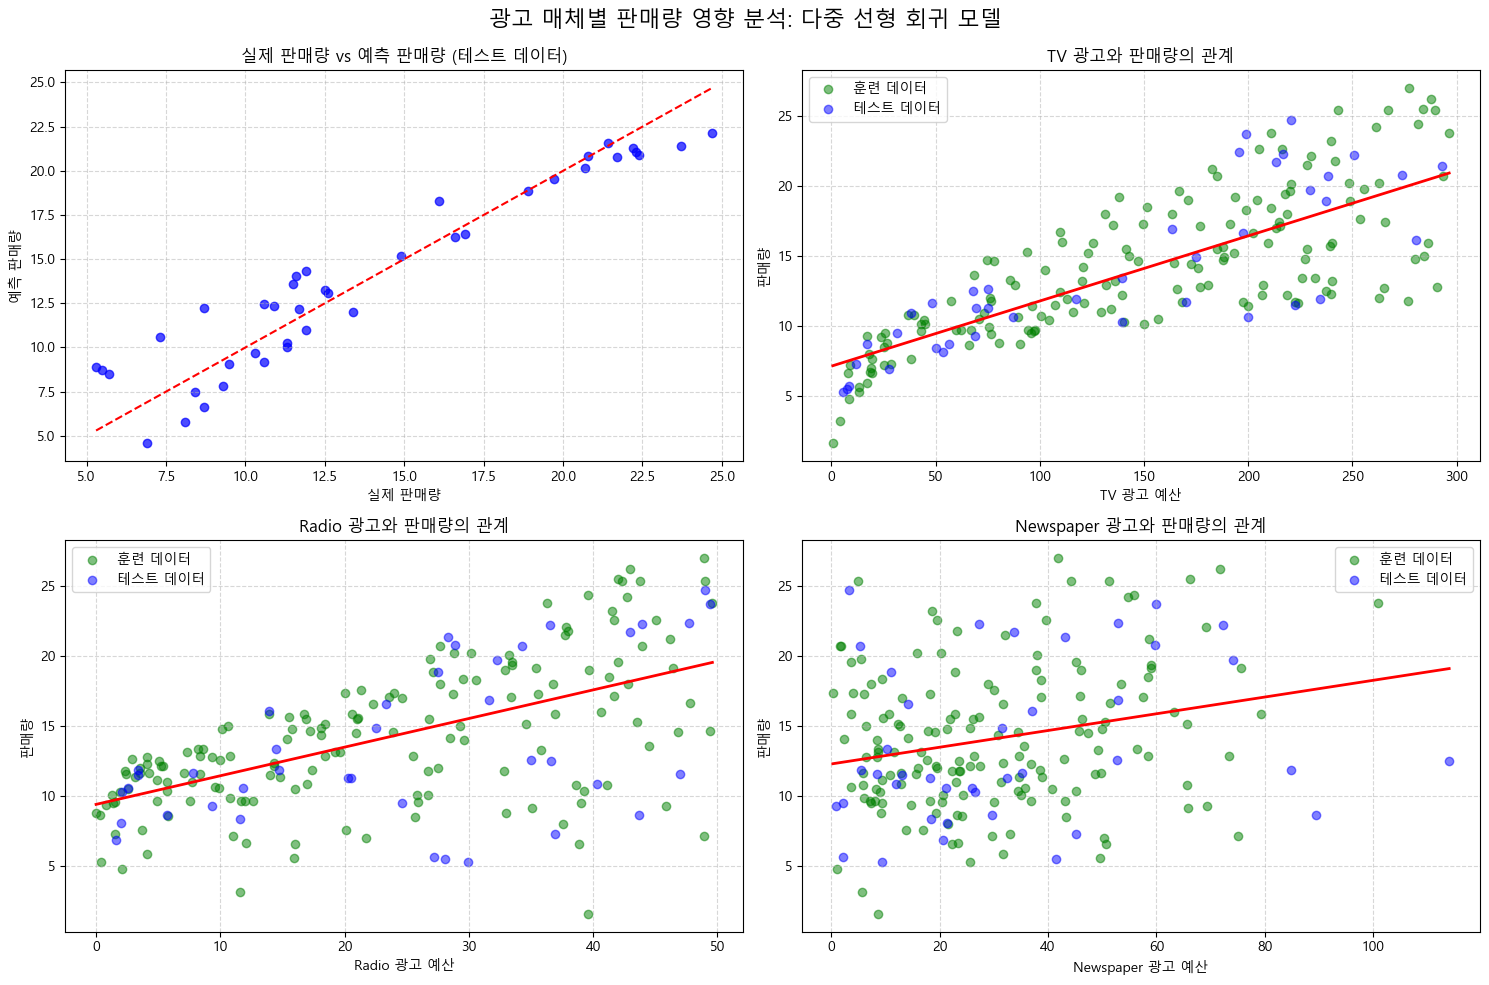

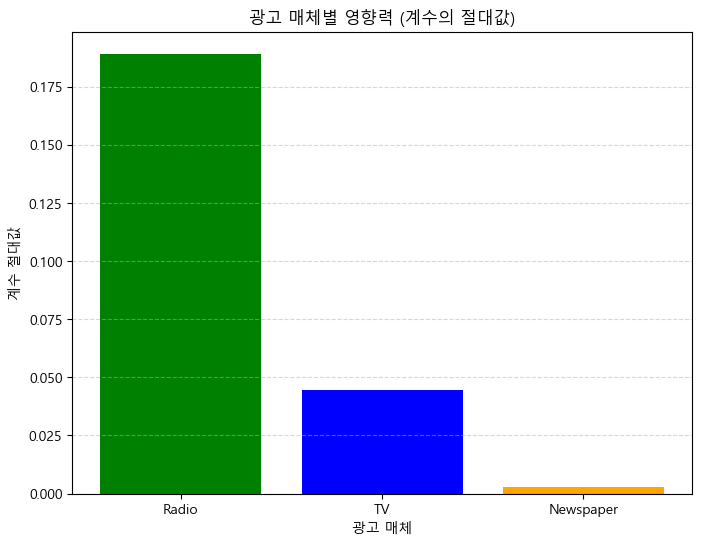

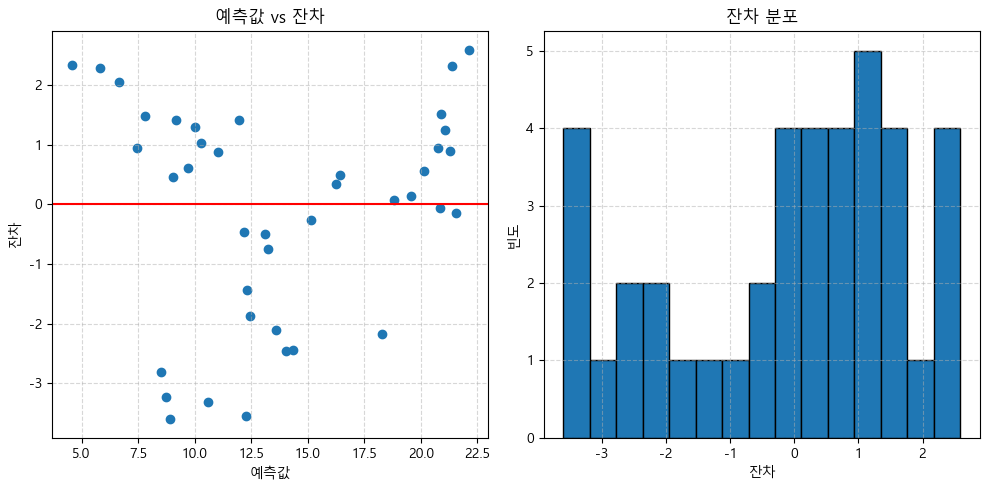

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv('./dataset/Advertising.csv')

X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

intercept = model.intercept_
coefficients = model.coef_

equation = f"Sales = {intercept:.4f} + {coefficients[0]:.4f}*TV + {coefficients[1]:.4f}*Radio + {coefficients[2]:.4f}*Newspaper"

new_data = np.array([
    [200, 50, 30],  # 새로운 광고 예산: TV=200, Radio=50, Newspaper=30
    [150, 30, 40],  # 다른 예산 조합
    [300, 70, 20]   # 또 다른 예산 조합
])

predictions = model.predict(new_data)
for i, pred in enumerate(predictions):
    print(f"예산 조합 {i+1} (TV={new_data[i][0]}, Radio={new_data[i][1]}, Newspaper={new_data[i][2]}) → 예측 판매량: {pred:.2f}")
    
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('실제 판매량 vs 예측 판매량 (테스트 데이터)')
plt.xlabel('실제 판매량')
plt.ylabel('예측 판매량')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
plt.scatter(X_train['TV'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['TV'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100).reshape(-1, 1)
tv_model = LinearRegression().fit(X_train[['TV']], y_train)
tv_y_pred = tv_model.predict(tv_range)
plt.plot(tv_range, tv_y_pred, color='red', linewidth=2)


plt.title('TV 광고와 판매량의 관계')
plt.xlabel('TV 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 3)
plt.scatter(X_train['Radio'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['Radio'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100).reshape(-1, 1)
radio_model = LinearRegression().fit(X_train[['Radio']], y_train)
radio_y_pred = radio_model.predict(radio_range)
plt.plot(radio_range, radio_y_pred, color='red', linewidth=2)

plt.title('Radio 광고와 판매량의 관계')
plt.xlabel('Radio 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 4)
plt.scatter(X_train['Newspaper'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['Newspaper'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

np_range = np.linspace(X['Newspaper'].min(), X['Newspaper'].max(), 100).reshape(-1, 1)
np_model = LinearRegression().fit(X_train[['Newspaper']], y_train)
np_y_pred = np_model.predict(np_range)
plt.plot(np_range, np_y_pred, color='red', linewidth=2)

plt.title('Newspaper 광고와 판매량의 관계')
plt.xlabel('Newspaper 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('광고 매체별 판매량 영향 분석: 다중 선형 회귀 모델', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

plt.figure(figsize=(8, 6))
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '계수': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('계수', ascending=False)

plt.bar(feature_importance['특성'], feature_importance['계수'], color=['green', 'blue', 'orange'])
plt.title('광고 매체별 영향력 (계수의 절대값)')
plt.xlabel('광고 매체')
plt.ylabel('계수 절대값')
plt.grid(True, linestyle='--', axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 5))
residuals = y_test - y_test_pred
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('예측값 vs 잔차')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, edgecolor='black')
plt.title('잔차 분포')
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()